# OM10 Tutorial

In this notebook we demonstrate the basic functionality of the `om10` package, including how to:

* Make some "standard" mock lensed quasar samples;
* Visualize those samples;
* Inspect individual systems.

### Requirements

You will need to have followed the installation instructions in the [OM10 README](https://github.com/drphilmarshall/OM10/blob/master/README.md).

In [1]:
from __future__ import division
import os, numpy as np

import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline

import om10

In [2]:
%load_ext autoreload
%autoreload 2

## Selecting Mock Lens Samples

Let's look at what we might expect from DES and LSST, by making two different selections from the OM10 database.

In [3]:
quads, doubles = {}, {}

In [4]:
DES = om10.DB()
DES.select_random(maglim=23.6, area=5000.0, IQ=0.9)

quads['DES'] = DES.sample[DES.sample['NIMG'] == 4]
doubles['DES'] = DES.sample[DES.sample['NIMG'] == 2]

print 'Predicted number of LSST quads, doubles: ', len(quads['DES']),',',len(doubles['DES'])
print 'Predicted LSST quad fraction: ', str(int(100.0*len(quads['DES'])/(1.0*len(doubles['DES']))))+'%'

OM10: Full db.lenses table contains 15658 systems
OM10: Initial db.sample contains 15658 systems
OM10: selection yields 734 lenses
Predicted number of LSST quads, doubles:  110 , 621
Predicted LSST quad fraction:  17%


In [5]:
LSST = om10.DB()
LSST.select_random(maglim=23.3, area=18000.0, IQ=0.7)

quads['LSST'] = LSST.sample[LSST.sample['NIMG'] == 4]
doubles['LSST'] = LSST.sample[LSST.sample['NIMG'] == 2]

print 'Predicted number of LSST quads, doubles: ', len(quads['LSST']),',',len(doubles['LSST'])
print 'Predicted LSST quad fraction: ', str(int(100.0*len(quads['LSST'])/(1.0*len(doubles['LSST']))))+'%'

OM10: Full db.lenses table contains 15658 systems
OM10: Initial db.sample contains 15658 systems
OM10: selection yields 2818 lenses
Predicted number of LSST quads, doubles:  415 , 2399
Predicted LSST quad fraction:  17%


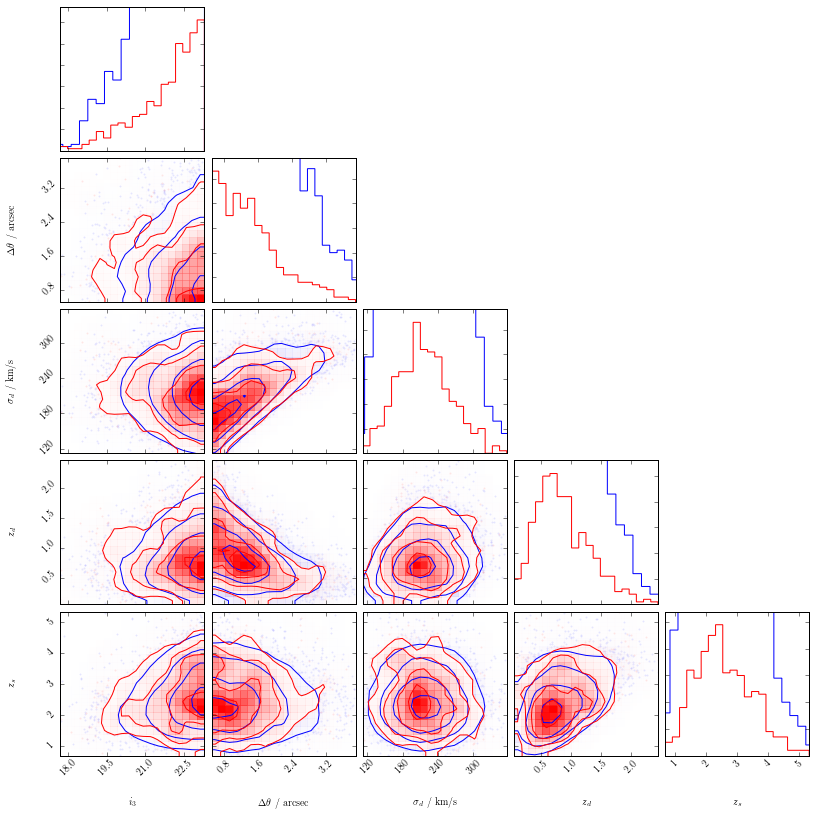

In [9]:
fig = om10.plot_sample(doubles['LSST'], color='blue')
fig = om10.plot_sample(quads['LSST'], color='red', fig=fig)

## Visualizing Lens Systems

Let's pull out some lenses and see what they look like.

OM10: Full db.lenses table contains 15658 systems
OM10: Initial db.sample contains 15658 systems
OM10: Extracted OM10 lens number 7176527:
 LENSID FLAGTYPE NIMG ZLENS VELDISP  ... SIGCRIT  DSLUM  L_I REFF REFF_T
------- -------- ---- ----- -------- ... ------- ------- --- ---- ------
7176527        0    2 0.556 175.7924 ...     0.0 14404.3 0.0  0.0    0.0
OM10: Plotting image configuration of lens ID  7176527
OM10: lens, image magnitudes: 20.9278469 [ 18.9618029   20.73899919]


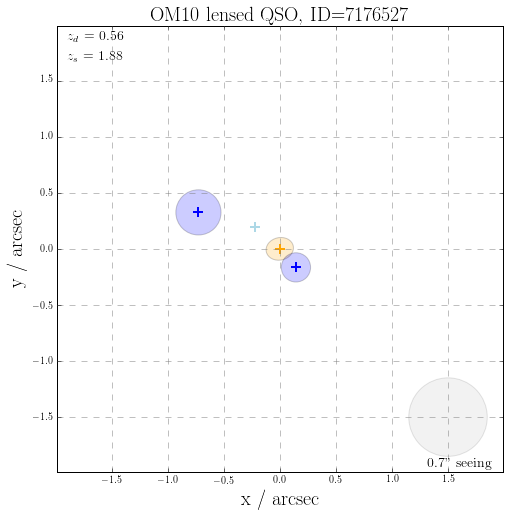

In [7]:
db = om10.DB()

# Pull out a specific lens and plot it:
id = 7176527
lens = db.get_lens(id)
om10.plot_lens(lens)

OM10: selection yields 3 lenses
OM10: Extracted OM10 lens number 8519202:
 LENSID FLAGTYPE NIMG ZLENS VELDISP  ... SIGCRIT  DSLUM  L_I REFF REFF_T
------- -------- ---- ----- -------- ... ------- ------- --- ---- ------
8519202        0    2 0.594 187.4995 ...     0.0 12361.0 0.0  0.0    0.0
OM10: Plotting image configuration of lens ID  8519202
OM10: lens, image magnitudes: 20.9420013 [ 20.64866789  20.10023269]
OM10: Extracted OM10 lens number 30184793:
 LENSID  FLAGTYPE NIMG ZLENS VELDISP  ... SIGCRIT  DSLUM  L_I REFF REFF_T
-------- -------- ---- ----- -------- ... ------- ------- --- ---- ------
30184793        0    4 1.002 244.9063 ...     0.0 22287.8 0.0  0.0    0.0
OM10: Plotting image configuration of lens ID  30184793
OM10: lens, image magnitudes: 21.7364826 [ 20.93813912  19.32964242  18.4383199   18.40202584]
OM10: Extracted OM10 lens number 14864406:
 LENSID  FLAGTYPE NIMG ZLENS VELDISP  ... SIGCRIT  DSLUM  L_I REFF REFF_T
-------- -------- ---- ----- -------- ... ------- 

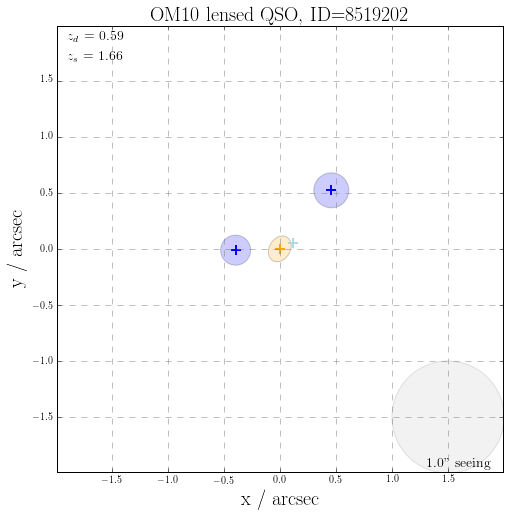

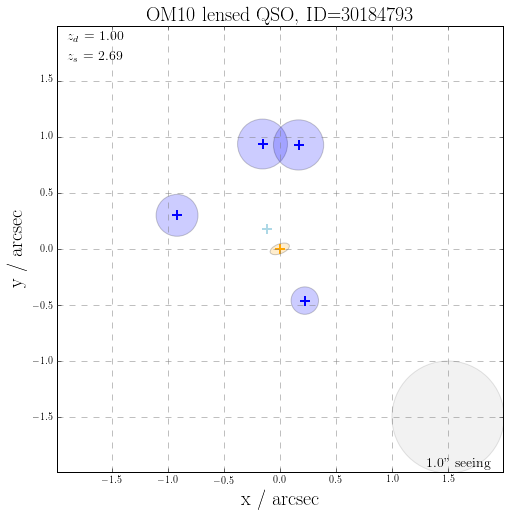

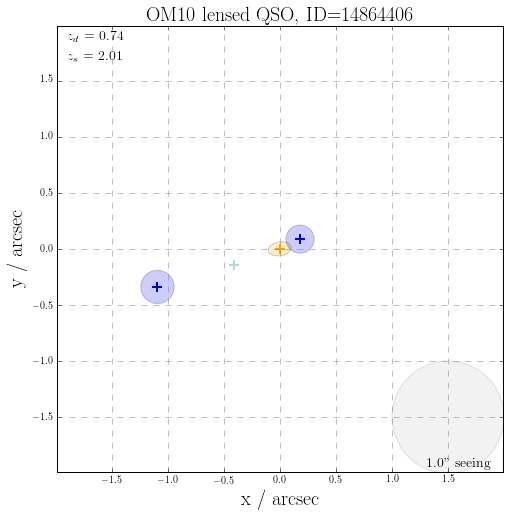

In [8]:
# Plot 3 random lenses from a given survey and plot them:
db.select_random(maglim=21.4, area=30000.0, IQ=1.0, Nlens=3)
for id in db.sample['LENSID']:
    lens = db.get_lens(id)
    om10.plot_lens(lens, IQ=1.0)